In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [2]:
data = pd.read_csv('RAandAoBIndemnity.csv')

In [3]:
data

,AoB,PolicyInsuredPropertyRoofAge,Avg. Corrected Incurred Indemnity
0,1,0,17520.120000
1,0,0,23537.393333
2,1,1,25500.585000
3,0,1,21299.017091
4,1,2,20917.278333
5,0,2,15584.324364
6,1,3,19218.780000
7,0,3,8684.483474
8,1,4,20670.366364
9,0,4,9260.475714


In [4]:
data.describe()

,AoB,PolicyInsuredPropertyRoofAge,Avg. Corrected Incurred Indemnity
count,66.000000,66.000000,66.000000
mean,0.409091,17.151515,19195.671524
std,0.495434,11.066571,11713.346502
min,0.000000,0.000000,0.000000
25%,0.000000,8.250000,11514.415343
50%,0.000000,16.500000,16892.034377
75%,1.000000,24.750000,22942.722738
max,1.000000,45.000000,68429.360000


In [5]:
# Following the regression equation, our dependent variable (y) is the Avg. Corrected Incurred Indemnity
y = data ['Avg. Corrected Incurred Indemnity']
# Similarly, our independent variable (x) is the PolicyInsuredPropertyAge and AoB
x1 = data [['PolicyInsuredPropertyRoofAge','AoB']]

In [6]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Avg. Corrected Incurred Indemnity   R-squared:                       0.145
Model:                                           OLS   Adj. R-squared:                  0.118
Method:                                Least Squares   F-statistic:                     5.354
Date:                               Fri, 15 Mar 2019   Prob (F-statistic):            0.00712
Time:                                       11:31:11   Log-Likelihood:                -706.29
No. Observations:                                 66   AIC:                             1419.
Df Residuals:                                     63   BIC:                             1425.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.374e+04   3041.724      4.519      0.000    7665.709    1.98e+04
PolicyInsuredPropertyRoofAge    95.7564    127.424      0.751      0.455    -158.879     350.392
AoB                           9311.3660   2846.279      3.271      0.002    3623.531     1.5e+04
==============================================================================
Omnibus:                       30.266   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.333
Skew:                           1.533   Prob(JB):                     2.91e-14
Kurtosis:                       6.642   Cond. No.                         55.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

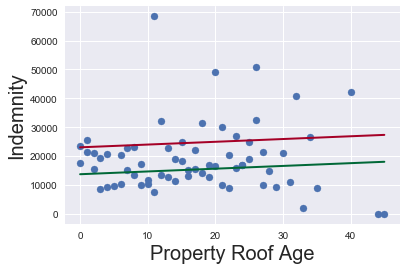

In [8]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['PolicyInsuredPropertyRoofAge'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 13740 + 95.7564*data['PolicyInsuredPropertyRoofAge']
yhat_yes = 23051.366 + 95.7564*data['PolicyInsuredPropertyRoofAge']
# Plot the two regression lines
fig = plt.plot(data['PolicyInsuredPropertyRoofAge'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['PolicyInsuredPropertyRoofAge'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('Property Roof Age', fontsize = 20)
plt.ylabel('Indemnity', fontsize = 20)
plt.show()

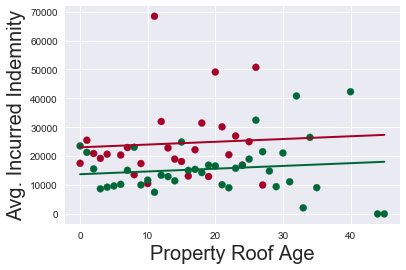

In [11]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['PolicyInsuredPropertyRoofAge'],data['Avg. Corrected Incurred Indemnity'], c=data['AoB'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 13740 + 95.7564*data['PolicyInsuredPropertyRoofAge']
yhat_yes = 23051.366 + 95.7564*data['PolicyInsuredPropertyRoofAge']

# Plot the two regression lines
fig = plt.plot(data['PolicyInsuredPropertyRoofAge'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['PolicyInsuredPropertyRoofAge'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('Property Roof Age', fontsize = 20)
plt.ylabel('Avg. Incurred Indemnity', fontsize = 20)
plt.show()